In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ab156f9643af92ce6d1e54a5d3eef71251043defe3f9184426a1bbfa3b998878
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173913 sha256=e7e0d7ed4705d5c100918ee34c0476db0337fdb7e7c84637306e21003a6d6c59
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
import pandas as pd
import pandas_ta as ta
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import backtesting as bt

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
key = 'GTVYSR9SUZQ0NJMI'

In [ ]:

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&outputsize=full&apikey={key}&datatype=csv'



In [ ]:
df = pd.read_csv(url)
df = pd.DataFrame(df)
display(df.head())

,timestamp,open,high,low,close,volume
0,2024-08-13,198.35,208.49,197.06,207.83,75890621
1,2024-08-12,199.02,199.26,194.67,197.49,64044903
2,2024-08-09,197.05,200.88,195.11,200.00,58648274
3,2024-08-08,195.70,200.70,192.04,198.84,65033874
4,2024-08-07,200.77,203.49,191.48,191.76,71159778


In [ ]:
df_dup = df.copy()
df_dup['timestamp'] = pd.to_datetime(df_dup['timestamp'])
df_dup.set_index('timestamp', inplace = True)
df_dup.tail()


,open,high,low,close,volume
timestamp,,,,,
2010-07-06,20.00,20.0000,15.83,16.11,6866900
2010-07-02,23.00,23.1000,18.71,19.20,5139800
2010-07-01,25.00,25.9200,20.27,21.96,8218800
2010-06-30,25.79,30.4192,23.30,23.83,17187100
2010-06-29,19.00,25.0000,17.54,23.89,18766300


In [ ]:
#convert timestamp field to datetime field
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.tail()

,timestamp,open,high,low,close,volume
3550,2010-07-06,20.00,20.0000,15.83,16.11,6866900
3551,2010-07-02,23.00,23.1000,18.71,19.20,5139800
3552,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3553,2010-06-30,25.79,30.4192,23.30,23.83,17187100
3554,2010-06-29,19.00,25.0000,17.54,23.89,18766300


In [ ]:
#filter data to last 2 years only
df = df[df['timestamp'] >= dt.datetime(2023,1,1)]
df.tail()

,timestamp,open,high,low,close,volume,ma_20,ma_50,std,bb_upper,bb_lower,rsi
400,2023-01-09,118.96,123.52,117.1100,119.77,190283951,149.6600,176.3826,26.665515,202.991031,96.328969,19.993290
401,2023-01-06,103.00,114.39,101.8100,113.06,220911051,145.5750,174.6922,25.630728,196.836456,94.313544,14.924624
402,2023-01-05,110.51,111.75,107.1601,110.34,157986324,141.5930,173.2340,24.531746,190.656492,92.529508,13.286162
403,2023-01-04,109.11,114.59,107.5200,113.64,180388976,137.8615,171.9042,22.662827,183.187154,92.535846,25.235761
404,2023-01-03,118.47,118.80,104.6400,108.10,231402818,134.1960,170.3836,21.124977,176.445953,91.946047,19.752251


In [ ]:
#calculate moving averages
df['ma_20'] = df['close'].rolling(20).mean()
df['ma_50'] = df['close'].rolling(50).mean()
df.tail()

<ipython-input-52-f1f4aeab643c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_20'] = df['close'].rolling(20).mean()
<ipython-input-52-f1f4aeab643c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_50'] = df['close'].rolling(50).mean()


,timestamp,open,high,low,close,volume,ma_20,ma_50,std,bb_upper,bb_lower,rsi
400,2023-01-09,118.96,123.52,117.1100,119.77,190283951,149.6600,176.3826,26.665515,202.991031,96.328969,19.993290
401,2023-01-06,103.00,114.39,101.8100,113.06,220911051,145.5750,174.6922,25.630728,196.836456,94.313544,14.924624
402,2023-01-05,110.51,111.75,107.1601,110.34,157986324,141.5930,173.2340,24.531746,190.656492,92.529508,13.286162
403,2023-01-04,109.11,114.59,107.5200,113.64,180388976,137.8615,171.9042,22.662827,183.187154,92.535846,25.235761
404,2023-01-03,118.47,118.80,104.6400,108.10,231402818,134.1960,170.3836,21.124977,176.445953,91.946047,19.752251


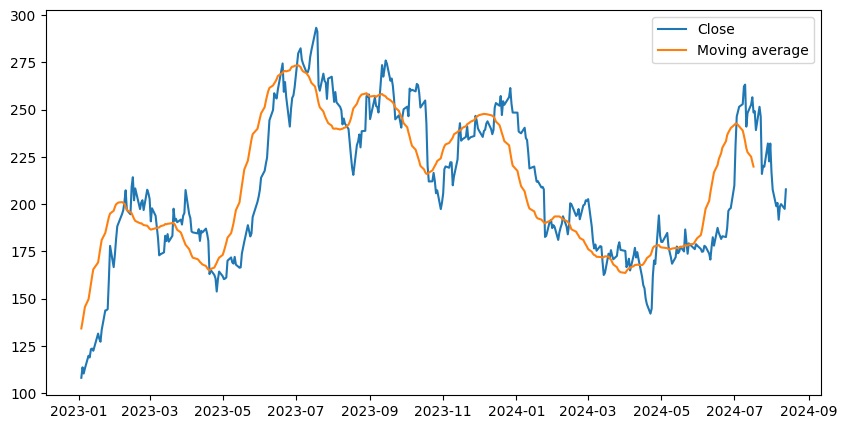

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['timestamp'], df['close'], label = 'Close')
plt.plot(df['timestamp'], df['ma_20'], label = 'Moving average')
plt.legend()
plt.show()

In [ ]:
#setup the bollinger bands
period = 20
df['std'] = df['close'].rolling(period).std()
df['bb_upper'] = df['ma_20'] + (2 * df['std'])
df['bb_lower'] = df['ma_20'] - (2 * df['std'])
df.tail()

<ipython-input-54-c8f264812e20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['std'] = df['close'].rolling(period).std()
<ipython-input-54-c8f264812e20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_upper'] = df['ma_20'] + (2 * df['std'])
<ipython-input-54-c8f264812e20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,timestamp,open,high,low,close,volume,ma_20,ma_50,std,bb_upper,bb_lower,rsi
400,2023-01-09,118.96,123.52,117.1100,119.77,190283951,149.6600,176.3826,26.665515,202.991031,96.328969,19.993290
401,2023-01-06,103.00,114.39,101.8100,113.06,220911051,145.5750,174.6922,25.630728,196.836456,94.313544,14.924624
402,2023-01-05,110.51,111.75,107.1601,110.34,157986324,141.5930,173.2340,24.531746,190.656492,92.529508,13.286162
403,2023-01-04,109.11,114.59,107.5200,113.64,180388976,137.8615,171.9042,22.662827,183.187154,92.535846,25.235761
404,2023-01-03,118.47,118.80,104.6400,108.10,231402818,134.1960,170.3836,21.124977,176.445953,91.946047,19.752251


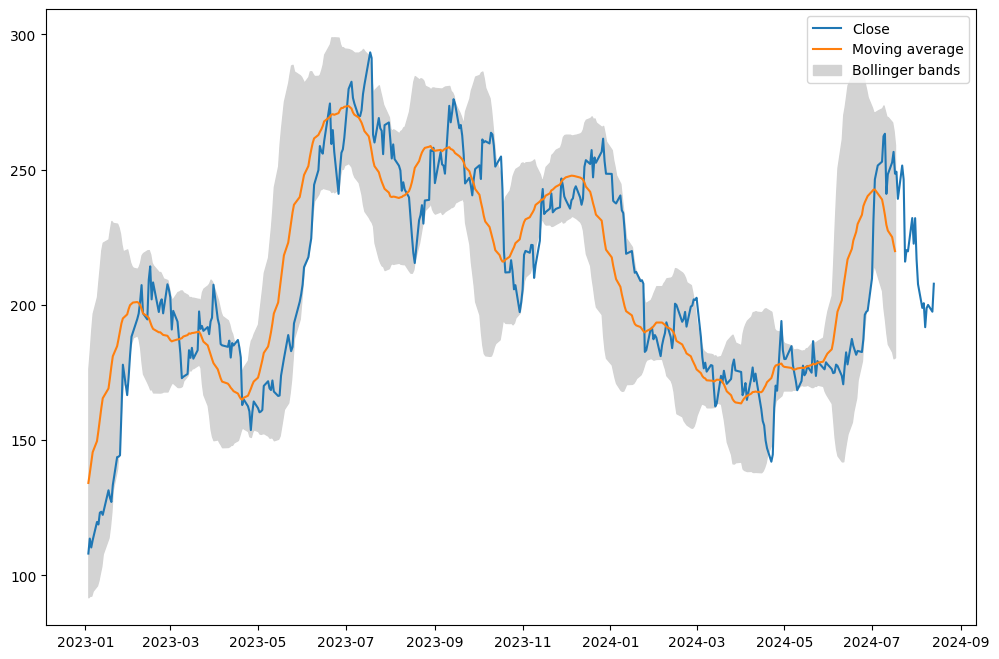

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['timestamp'], df['close'], label = 'Close')
plt.plot(df['timestamp'], df['ma_20'], label = 'Moving average')
#plt.plot(df['timestamp'], df['bb_upper'], df['bb_lower'], label = 'Bollinger band')
plt.fill_between(df['timestamp'], df['bb_upper'], df['bb_lower'], label = 'Bollinger bands', color = 'lightgrey')
plt.legend()
plt.show()

In [ ]:
#calculate the RSI
df['rsi'] = ta.rsi(df['close'], length = 6)
df.tail()

<ipython-input-56-f52a34bf09b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.rsi(df['close'], length = 6)


,timestamp,open,high,low,close,volume,ma_20,ma_50,std,bb_upper,bb_lower,rsi
400,2023-01-09,118.96,123.52,117.1100,119.77,190283951,149.6600,176.3826,26.665515,202.991031,96.328969,19.993290
401,2023-01-06,103.00,114.39,101.8100,113.06,220911051,145.5750,174.6922,25.630728,196.836456,94.313544,14.924624
402,2023-01-05,110.51,111.75,107.1601,110.34,157986324,141.5930,173.2340,24.531746,190.656492,92.529508,13.286162
403,2023-01-04,109.11,114.59,107.5200,113.64,180388976,137.8615,171.9042,22.662827,183.187154,92.535846,25.235761
404,2023-01-03,118.47,118.80,104.6400,108.10,231402818,134.1960,170.3836,21.124977,176.445953,91.946047,19.752251


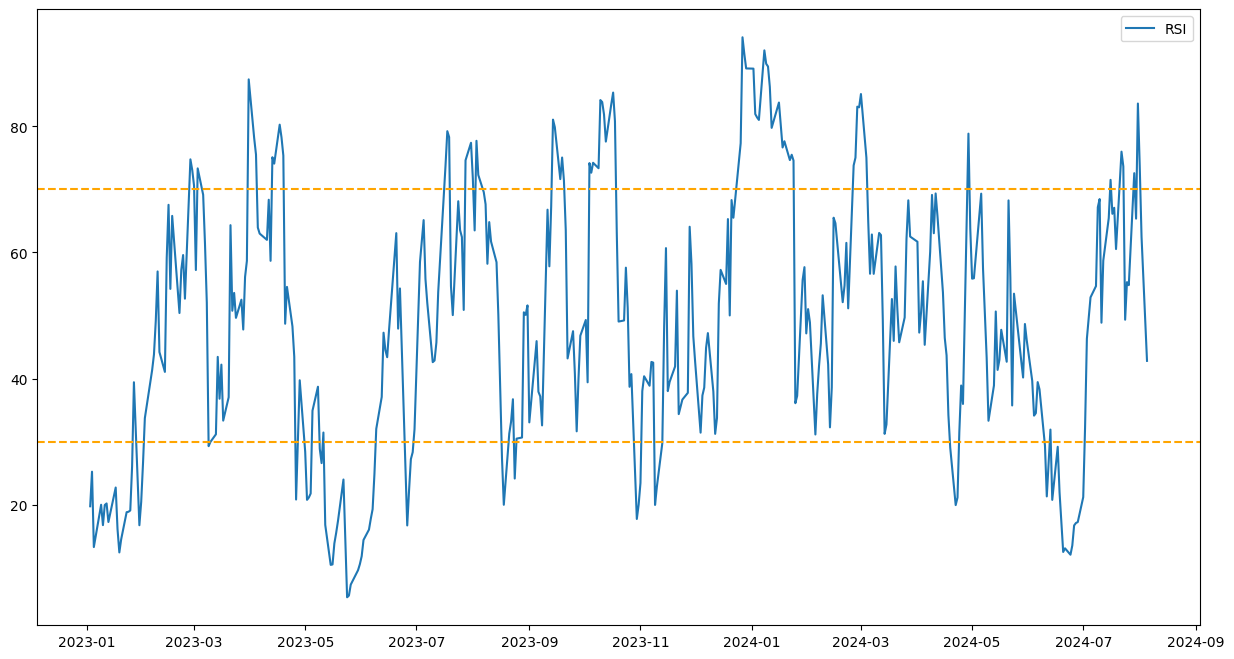

In [ ]:
#plot RSI on the graph
plt.figure(figsize=(15,8))

plt.plot(df['timestamp'], df['rsi'], label = 'RSI')
plt.axhline(30, linestyle = '--', color = 'orange')
plt.axhline(70, linestyle = '--', color = 'orange')
plt.legend()
plt.show()

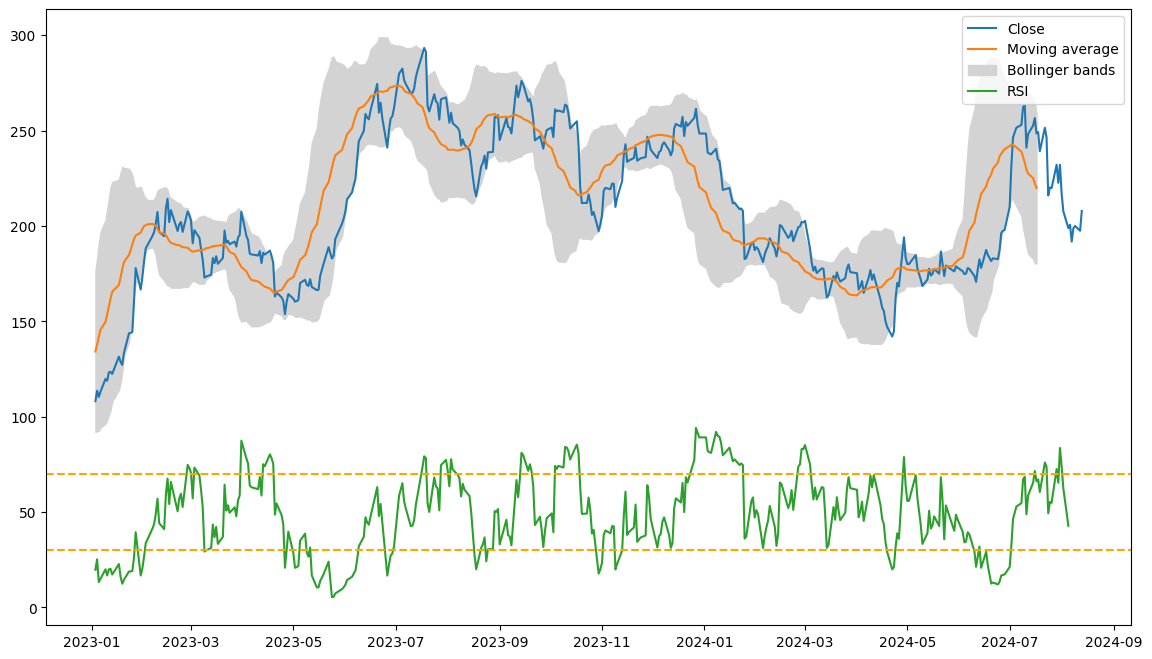

In [ ]:
#All indicators in one place
plt.figure(figsize=(14,8))
plt.plot(df['timestamp'], df['close'], label = 'Close')
plt.plot(df['timestamp'], df['ma_20'], label = 'Moving average')
#plt.plot(df['timestamp'], df['bb_upper'], df['bb_lower'], label = 'Bollinger band')
plt.fill_between(df['timestamp'], df['bb_upper'], df['bb_lower'], label = 'Bollinger bands', color = 'lightgrey')
plt.plot(df['timestamp'], df['rsi'], label = 'RSI')
plt.axhline(30, linestyle = '--', color = 'orange')
plt.axhline(70, linestyle = '--', color = 'orange')
plt.legend()
plt.show()

In [ ]:
#Setting up BUY and SELL signals
#If RSI < 30 and price less than lower bollinger - BUY next day
#If RSI > 70 and price above upper bollinger - SELL next day

df['signal'] = np.where((df['rsi'] < 30) & (df['close'] < df['bb_lower']), 1, 0)
df['signal'] = np.where((df['rsi'] > 70) & (df['close'] > df['bb_upper']), -1, df['signal'])

#BUY/SELL the next day
df['signal'] = df['signal'].shift()
df['signal'] = df['signal'].fillna(0)
df.tail(20)

,timestamp,open,high,low,close,volume,ma_20,ma_50,std,bb_upper,bb_lower,rsi,signal,buy_date,sell_date
385,2023-01-31,164.570,174.3000,162.7800,173.22,196813541,198.4475,192.2948,9.888540,218.224580,178.670420,20.472520,1.0,,
386,2023-01-30,178.050,179.7700,166.5000,166.66,230878807,196.4950,192.0172,12.007316,220.509633,172.480367,16.746368,1.0,,
387,2023-01-27,162.430,180.6800,161.1700,177.90,306590613,195.0085,191.8394,12.390424,219.789348,170.227652,39.417763,1.0,,
388,2023-01-26,159.965,161.4200,154.7600,160.27,234815090,193.1780,191.3546,14.605651,222.389302,163.966698,26.060346,0.0,,
389,2023-01-25,141.905,146.4100,138.0700,144.43,192734347,190.2960,190.5420,18.041410,226.378820,154.213180,19.086870,1.0,,
390,2023-01-24,143.000,146.5000,141.1000,143.89,158699056,187.4475,189.7094,20.601478,228.650455,146.244545,18.880191,1.0,,
391,2023-01-23,135.870,145.3793,134.2700,143.75,203119211,184.7665,188.7328,22.631205,230.028909,139.504091,18.816801,1.0,,
392,2023-01-20,128.680,133.5100,127.3466,133.42,138858136,181.0220,187.5058,24.637368,230.296736,131.747264,14.504785,0.0,,
393,2023-01-19,127.260,129.9900,124.3082,127.17,170291880,177.2785,185.9000,26.863205,231.004910,123.552090,12.435751,0.0,,
394,2023-01-18,136.555,136.6800,127.0100,128.78,195680318,173.0055,184.5700,27.464604,227.934709,118.076291,16.133781,0.0,,


In [ ]:
#Backtesting
def backtest(df):
  position = 0
  net_profit = 0
  percentageChange = []
  df['buy_date'] = ''
  df['sell_date'] = ''

  for i in range(len(df)):
    if df['signal'][i] == 1:
      if position == 0:
        position = 1
        buy_price = df['close'][i]
        buy_date = df['timestamp'][i]
        print("Buying at " + str({buy_price}) + "on" +  str({buy_date}))

    elif df['signal'][i] == -1:
      if position == 1:
        position = 0
        sell_price = df['close'][i]
        sell_date = df['timestamp'][i]
        bought = 0
        print("Selling at " +  str({sell_price}) + "on" + str({sell_date}))

        percentageChange.append((sell_price - buy_price) / buy_price * 100)
        net_profit += (sell_price - buy_price)

  gains = 0
  losses = 0
  no_gains = 0
  no_losses = 0
  totalRet = 1
  net_gains = 0
  avg_gain = 0
  avg_loss = 0
  win_rate = 0


  for i in percentageChange:
    if i > 0:
      gains += i
      no_gains += 1
    else:
      losses += i
      no_losses += 1
    totalRet = totalRet * ((i / 100) + 1)
    #totalRet = round(totalRet, 2)

  totalRet = (totalRet - 1) * 100



  if(no_gains > 0):
    avg_gain = gains / no_gains
  else:
    avg_gain = "undefined"

  if(no_losses > 0):
    avg_loss = losses / no_losses
  else:
    avg_loss = "undefined"

  if(no_gains > 0 and no_losses > 0):
    win_rate = (no_gains / (no_losses + no_gains))*100
  else:
    win_rate = 0

  print()
  print("--------------------METRICS-------------------")
  print("Total Trades = " + str({no_gains + no_losses}))
  print("Win Rate = " + str({win_rate}))
  print("Total Return = " + str({totalRet}))
  print("Win rate = " + str({win_rate}))
  print("----------------------------------------------")
  print()

In [ ]:
backtest(df)

Buying at {197.88}on{Timestamp('2024-06-28 00:00:00')}
Selling at {168.29}on{Timestamp('2024-04-26 00:00:00')}
Buying at {142.05}on{Timestamp('2024-04-22 00:00:00')}
Selling at {202.64}on{Timestamp('2024-03-01 00:00:00')}
Buying at {214.65}on{Timestamp('2023-11-10 00:00:00')}
Selling at {254.85}on{Timestamp('2023-10-17 00:00:00')}
Buying at {236.86}on{Timestamp('2023-08-23 00:00:00')}
Selling at {293.34}on{Timestamp('2023-07-18 00:00:00')}
Buying at {256.6}on{Timestamp('2023-06-23 00:00:00')}
Selling at {184.31}on{Timestamp('2023-04-18 00:00:00')}
Buying at {173.22}on{Timestamp('2023-01-31 00:00:00')}

--------------------METRICS-------------------
Total Trades = {5}
Win Rate = {60.0}
Total Return = {28.134448013805557}
Win rate = {60.0}
----------------------------------------------

